# <center>Предсказание цен на недвижимость<center>

#### Импортируем необходимые библиотеки и настраиваем параметры для отрисовки графиков

In [415]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

rcParams.update({'font.size': 15, 'font.family': 'Times New Roman'})
#warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## <center> I. Обработка данных <center>
   
####    0. Импорт данных
####    1. Изменение типов данных
####    2. Обработка выбросов
####    3. Заполнение пропущенных значений
####    4. One-hot-encoding на категориальных пизнаках
####    5. Добавление новых признаков
####    6. Сохранение обработанного датасета

### 0. Импорт данных

In [416]:
data = pd.read_csv('train (1).csv')
data.sample(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3336,6039,47,2.0,55.278957,33.813410,9.0,5,16.0,1978,0.101872,B,B,23,4583,3,NaN,3,3,B,242275.324227
7676,8584,21,1.0,31.576955,17.824405,6.0,5,5.0,1959,0.034331,B,B,25,5487,3,NaN,0,4,B,136450.516990
1752,7624,119,3.0,79.300055,46.815837,10.0,2,9.0,2006,0.000995,B,B,42,7651,1,NaN,1,5,B,377410.752146


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Данные содержат 18 столбцов __features__ и 1 столбец __Price__ - целевая переменная. Всего 10000 строк.


### <center>Описания полей датасета по недвижимости<center>


__Id__ - идентификационный номер квартиры,

#### <center>Features<center>

__DistrictId__ - идентификационный номер района,

__Rooms__ - количество комнат,

__Square__ - площадь,

__LifeSquare__ - жилая площадь,

__KitchenSquare__ - площадь кухни,

__Floor__ - этаж,

__HouseFloor__ - количество этажей в доме,

__HouseYear__ - год постройки дома,

__Ecology_1__, __Ecology_2__, __Ecology_3__ - экологические показатели местности,

__Social_1__, __Social_2__, __Social_3__ - социальные показатели местности,

__Healthcare_1__, __Helthcare_2__ - показатели местности, связанные с охраной здоровья,

__Shops_1__, __Shops_2__ - показатели, связанные с наличием магазинов, торговых центров,
 
#### <center>Target<center>

__Price__ - цена квартиры.
    
### <center>Обработка типов данных, выбросов и пропущенных значений<center>
    
#### 1. Типы данных
    
Преобразуем типы данных признаков, чтобы использовать меньше оперативной памяти
    
__float64 --> float32__
    
__int64 --> int32 --> int16 --> int8__
    
__object  --> categorial__
    
#### 2. Выбросы
    
Посмотрим ящики с усами и гистограммы данных, чтобы понять, где есть выбросы
 
#### 3. Пропущенный значения
    
Как видно из таблицы всего два признака, имеющих пропущенные значения __LifeSquare__ и __Healthcare1__
    
#### 4. __One-hot-encodin__
    
Разделим категориальные признаки на несколько столбоцов 
    
#### 5. Добавление новых признаков
    
Избавимся от линейной зависимости (сильно скоррелированных признаков) с помощью нелинейного преобразования

### 1. Изменение типов данных

In [166]:
def change_data_type(data):
    """
    change type data to reduce using RAM
    """
    start_memory = data.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe: {start_memory:.2f} Mb')
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                else:
                    data[col] = data[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float32)
        else:
            data[col] = data[col].astype('category')

            
    end_memory = data.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_memory:.2f} Mb')
    print(f'Decreased by {(start_memory - end_memory) / start_memory * 100:.1f}')
    

In [417]:
change_data_type(data)

Memory usage of dataframe: 1.53 Mb
Memory usage after optimization is: 0.49 Mb
Decreased by 68.1


In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

Как видно, уменьшение используемой памяти уменьшилось на 68%

### 2. Обработка выбросов

In [500]:
features_arr = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

num_features_arr = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 
                'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 
                'Shops_1']

category_features_arr = ['Ecology_2', 'Ecology_3', 'Shops_2']

target_arr = ['Price']

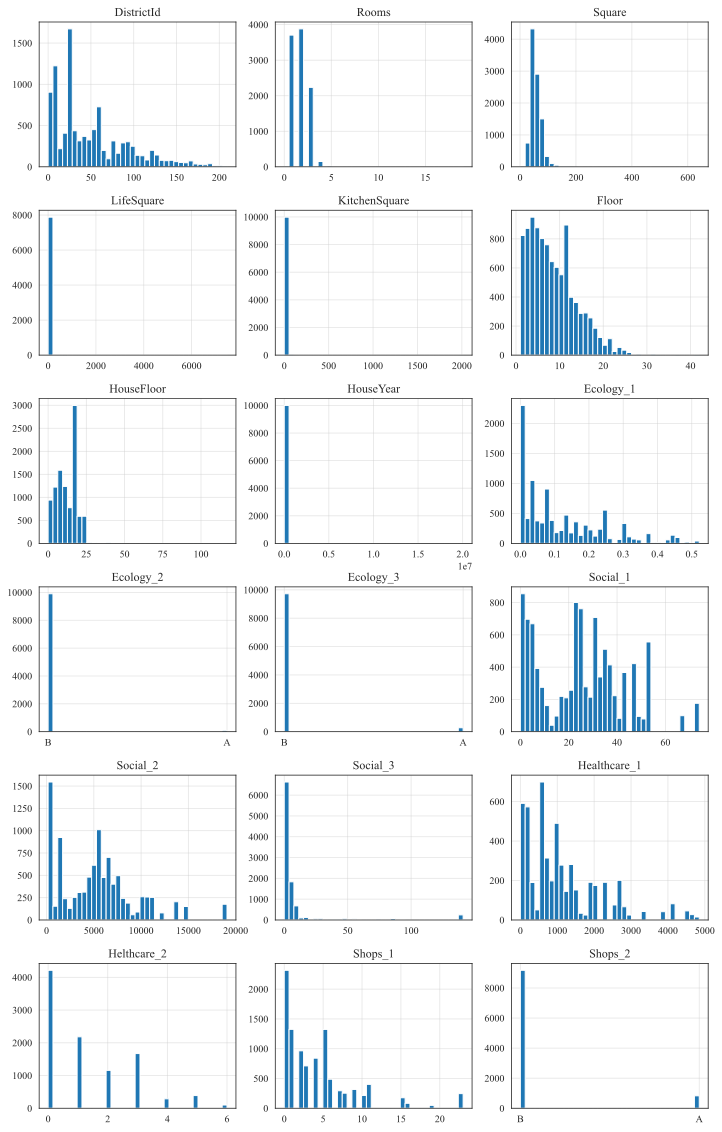

In [420]:
n_bins = int(1.72 * (data.shape[0])**(1/3))

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,20))
ax = ax.flatten()
for ax_, feature in zip(ax, features_arr):
    ax_.hist(data[feature][data[feature].notna()], bins=n_bins)
    ax_.set_title(feature)
    ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

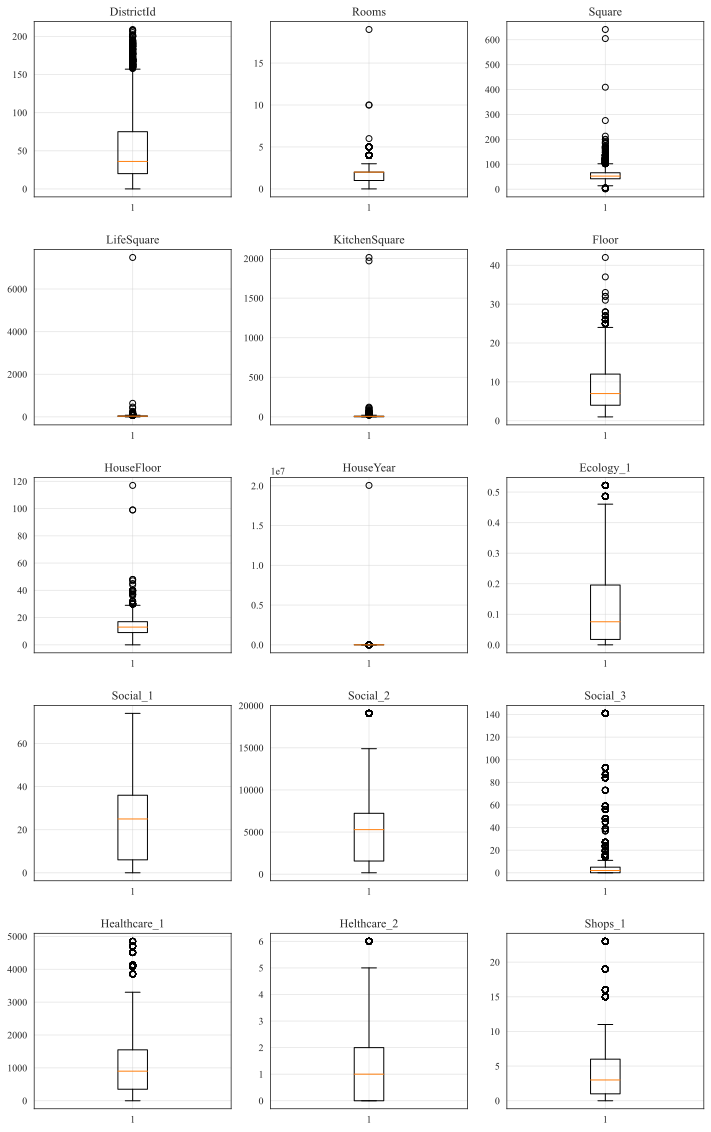

In [421]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
ax = ax.flatten()
for ax_, feature in zip(ax, num_features_arr):
    if str(data[feature].dtype) != 'category':
        ax_.boxplot(data[feature][data[feature].notna()])
        ax_.set_title(feature)
        ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [143]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214139.218750
std,4859.01902,43.587592,0.839523,21.058718,86.241112,28.561113,5.241148,6.776192,2.005003e+05,0.119026,17.532614,4006.799803,23.831875,1021.518982,1.493601,4.806341,92872.304688
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Для того чтобы обработать выбросы, необходимо понять, какие значения могут принимать признаки. Для этого посмотрим на гистограммы и ящики с усами, чтобы рассмотреть эти выбросы. Будем считать, что в категориальных признаках и в Id нет выбросов, так как значения детерминированы. 

1. __Rooms__

    Наблюдаются выбросы, выходящие за интерквартильный размах. Напримерм, кол-во комнат 10, 19 с учетом небольшой жилой площади и 0. Поэтому заменим соответствующие значения на 0.9 квантиль и 0.1 соответственно.
    
    
2. __Square__

    Квартиры могут быть с большой площадью, но при этом должно быть либо очень много комнат, либо (обычно такое наблюдается) это последний этаж, то есть __Floor__ == __HouseFloor__. Также учтем, что стоимость больших квартиры, как правило, больше средней. Самые большие выбросы будем оценивать по району и ценам на квартиры в этих районах.
    
    
3. __LifeSquare__

    Во-первых, площадь должна быть не больше, чем вся площадь жилья. Поэтому там, где она больше, приравняем __Square__
    
    
4. __KitchenSquare__

    Аналогично предыдущему пункту, только приравниваем среднему. Там где __KitchenSquare__ == 0 приравняем тоже среднему.
    
    
5. __Floor__

    Этаж не может быть больше кол-ва этажей в доме.
    
    
6. __HouseFloor__

    Дом не может быть слишком большим. Либо же это небоскреб. Макимальный дом в нашем датасете имеет 117 этажей, что вполне нормально.
    

7. __HouseYear__

    Дом не может быть слишком старым. Также год постройки дома не может быть больше текущего года.
    
В остальных пунктах не совсем понятно сущность велечин показателей. Поэтому оставим их без изменений.

#### 1. Rooms

In [422]:
data.loc[data.Rooms ==0, 'Rooms'] = data.Rooms.quantile(0.05)
data.loc[data.Rooms > 5, 'Rooms'] = data.Rooms.quantile(0.95)

In [423]:
data.Rooms.value_counts()

2.0    3880
1.0    3713
3.0    2239
4.0     150
5.0      18
Name: Rooms, dtype: int64

#### 2. Square

In [424]:
# bound of outliers data
data_outliers_square_value_max = data.Square.mean() + 1.5 * (data.Square.quantile(0.75) - data.Square.quantile(0.25))
data_outliers_square_value_min = data.Square.mean() - 1.5 * (data.Square.quantile(0.75) - data.Square.quantile(0.25))
print(f'bounds of outliers: [{data_outliers_square_value_min:.2f}, {data_outliers_square_value_max:.2f}]')


bounds of outliers: [20.13, 92.50]


In [425]:
index = data.loc[data['Square'] > data_outliers_square_value][data.Price < data.Price.mean()].index
data.loc[index, 'Square'] = data.Square.mean()
data.loc[data.Square < 5, 'Square'] = data_outliers_square_value_min

In [426]:
data[data.Square > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.250
1982,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.875
9910,16568,27,4.0,200.334534,201.627365,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.500


In [427]:
data[data.DistrictId == 86][['Square', 'Price']].sort_values('Square').tail(3)

,Square,Price
9259,73.132690,459012.1250
1503,108.057396,310305.0625
1982,275.645294,455264.8750


In [428]:
data[data.DistrictId == 27][['Square', 'Price']].sort_values('Square').tail(3)

,Square,Price
9350,140.242981,342859.75
9910,200.334534,528560.50
1981,212.932358,302211.25


Как видно, несмотря на то, что квартиры слишком большие, цены на них тоже большие. Поэтому оставим эти данные без изменений.

3. __LifeSquare__

In [429]:
data.loc[data.LifeSquare > data.Square, 'LifeSquare'] = data.loc[data.LifeSquare > data.Square, 'Square']

4. __KitchenSquare__

In [430]:
data.loc[data.KitchenSquare > data.Square, 'KitchenSquare'] = data.KitchenSquare.mean()
data.loc[data.KitchenSquare == 0, 'KitchenSquare'] = data.KitchenSquare.mean()

5. __Floor__

In [431]:
data.loc[data.Floor > data.HouseFloor, 'Floor'] = data.loc[data.Floor > data.HouseFloor, 'HouseFloor']

7. __HouseYear__

Также поменяем признак. Лучше указать возраст дома, чем его год постройки

In [520]:
data.loc[data.HouseYear < 1910, 'HouseYear'] = data.HouseYear.quantile(0.25)
data.loc[data.HouseYear > 2022, 'HouseYear'] = 2022
data.HouseYear = 2022 - data.HouseYear

Посмотрим теперь на распределение данных

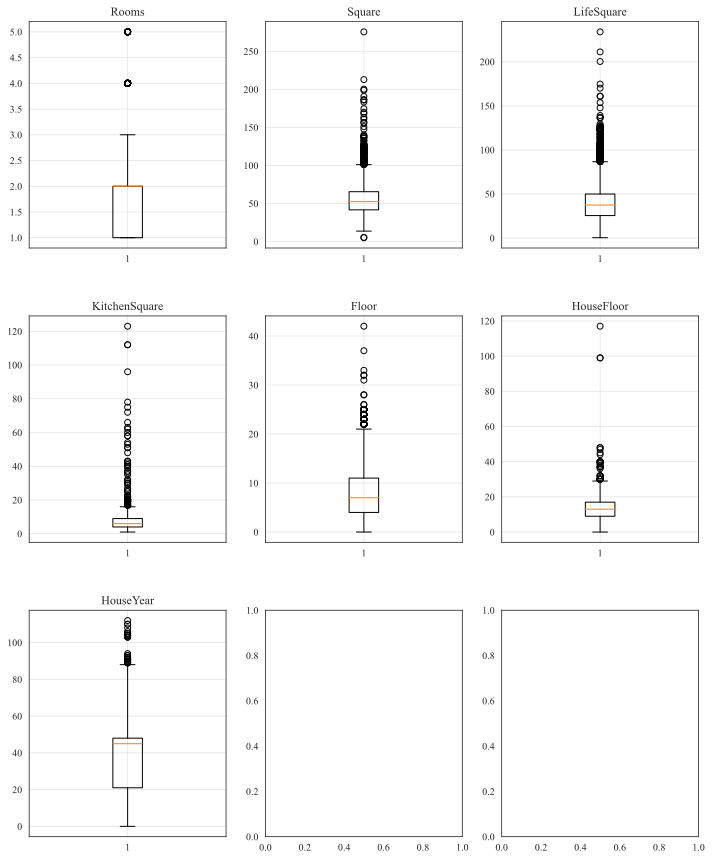

In [521]:
columns = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,15))
ax = ax.flatten()
for ax_, feature in zip(ax, columns):
    if str(data[feature].dtype) != 'category':
        ax_.boxplot(data[feature][data[feature].notna()])
        ax_.set_title(feature)
        ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

Как видно, выбросов стало меньше. Данные стали больше сконцентрированы около интерквартильного размаха.

### 3. Заполнение пропусков

Чтобы заполнить пропуски, надо разобраться, какие значения брать, среднее, минимальное, максимальное либо квантили? Для этого посмотрим на пропуски

1. __LifeSquare__

Тут все просто. Возьмем значения с __Square__

In [439]:
data.loc[data.LifeSquare.isna(), 'LifeSquare'] = data.loc[data.LifeSquare.isna(), 'Square']

2. __HealthCare_1__

Посмотрим на второй показателей __Helthcare_2__. Возьмем его уникальные значения, где __HealthCare_1__ == Nan. И по ним в таблице вычислим среднее для __HealthCare_1__

In [454]:
healthcare_2_unique = data[data.Healthcare_1.isna()].Helthcare_2.unique()

In [480]:
data.loc[data.Healthcare_1.isna(), 
         'Healthcare_1'] = data[data.Helthcare_2.isin(healthcare_2_unique)].Healthcare_1.mean()

In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  float32 
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   10000 non-null  float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

Как видно, теперь наш датасет занимает меньше места в оперативной памяти, почти не имеет выбросов и не имеет пропущенных значений. 

Хорошая работа __:)__

### 4. One-hot-encoding

In [522]:
cat_features_df = pd.get_dummies(data[category_features_arr])
num_features_df = data[num_features_arr]

In [533]:
df = pd.concat([num_features_df, cat_features_df, data[target_arr]], axis=1)

In [524]:
df.sample(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
127,28,2.0,43.771828,33.242168,5.0,3.0,9.0,54,0.118537,30,...,1183.0,1,0,0,1,0,1,0,1,203425.390625
2181,26,1.0,51.808487,39.659981,1.0,5.0,20.0,9,0.000000,36,...,2672.0,0,2,0,1,0,1,0,1,262995.500000
3230,37,2.0,58.405273,29.411280,7.0,12.0,12.0,42,0.122190,25,...,1308.0,1,3,0,1,0,1,0,1,237718.718750


### 5. Добавление новых признаков

Посмотрим на матрицу корреляции признаков. Будем смотреть на числовые признаки.

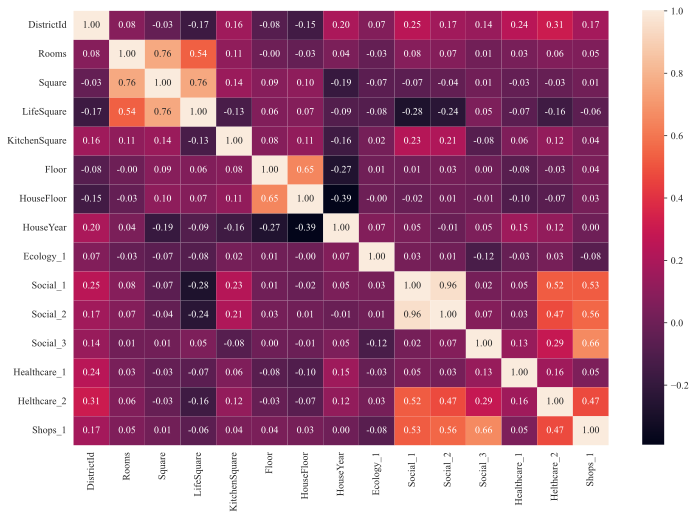

In [534]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df[num_features_arr].corr(), fmt='.2f', annot=True, ax=ax);

Коэффициенты корреляции характеризуются силой и значимостью.

Классификация коэффициентов корреляции по силе.

1. сильная	r > 0,70

2. средняя	0,50 < r < 0,69

3. умеренная	0,30 < r < 0,49

Наблюдается сильная корреляция в __LifeSquare__ и в __Square__; __Rooms__ и __Square__. Попробуем изменить эти признаки, с помощью нелинейного преобразования:

1. __LifeSquare__

Из __LifeSquare__ вычтим __KitchenSquare__ и поделим на __Square__. Таким образом получим долю жилой зоны (без кухни) от всей площади.

2. __Rooms__

Возьмем __LifeSquare__ и поделим на __Rooms__. Получим среднюю площадь комнаты.

In [535]:
df.LifeSquare = (df.LifeSquare - df.KitchenSquare) / df.Square
df.Rooms = df.LifeSquare / df.Rooms
df.rename(columns={'Rooms': 'Rooms_square'}, inplace=True)

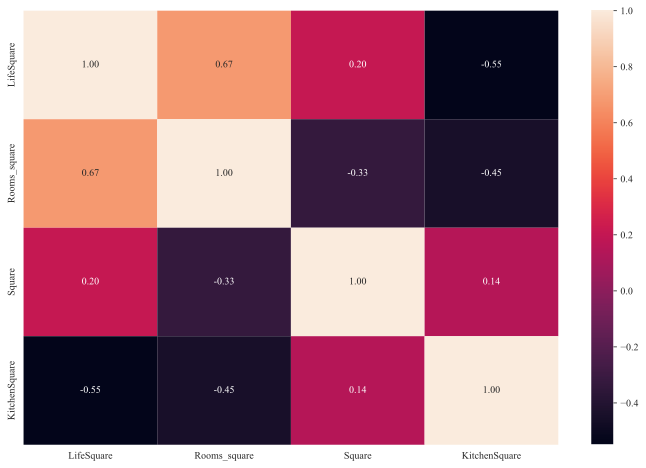

In [537]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df[['LifeSquare', 'Rooms_square', 'Square', 'KitchenSquare']].corr(), fmt='.2f', annot=True, ax=ax);

Как видно из матрицы корреляций, данные стали меньше скоррелированы, чего мы и добивались.

### 6. Сохранение обработанного датасета

In [ ]:
df.to_csv('')